In [3]:
from google.colab import files
uploaded = files.upload()

Saving gld_price_data.csv to gld_price_data (1).csv


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn import metrics

In [8]:
gd = pd.read_csv('gld_price_data.csv')

In [9]:
gd.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [10]:
gd.shape

(2290, 6)

In [11]:
gd.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
gd.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [13]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
gd.isnull().sum()


,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [15]:

gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
# find the correlations
# +ve , -ve correlation

In [17]:
numerical_features = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']
relation = gd[numerical_features].corr()

<Axes: >

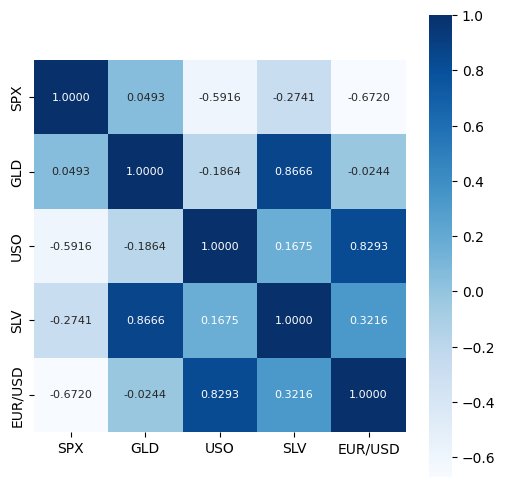

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(relation,cbar=True , square = True, fmt ='.4f' , annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
print(relation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [20]:
print(relation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [21]:
#distribution of the gold proce

<ipython-input-22-cf04da9c21fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gd['GLD'], color='g')


<Axes: xlabel='GLD', ylabel='Density'>

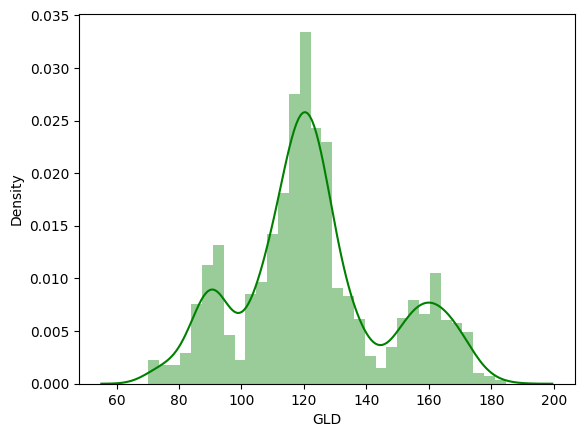

In [22]:
sns.distplot(gd['GLD'], color='g')

In [23]:
X = gd.drop(['Date','GLD'],axis = 1)
Y = gd['GLD']

In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [27]:
lamma = RandomForestRegressor(n_estimators=100)

In [28]:
lamma.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
phi = lamma.predict(X_test)

In [30]:
print (phi)

[168.75119951  82.21019979 115.94769955 127.74120067 120.73580165
 154.75849772 150.68169914 126.15389999 117.43819874 125.96490072
 116.60350063 171.38490063 141.60919908 168.08599865 115.0806999
 117.71220031 138.4628032  170.08280097 159.94090379 159.64889928
 155.17310038 125.26700024 175.82169959 157.12250324 125.13410025
  93.74379968  77.99139976 120.51169988 119.03199915 167.56670022
  88.1207     125.32950019  91.01270079 117.54030043 121.06959925
 136.61080098 115.54410122 115.11330094 147.07319978 106.74610075
 104.30690268  87.09229782 126.52120047 118.00980041 152.11209874
 119.75210016 108.59290008 108.29039848  93.02150025 127.16219776
  75.40380026 113.55959874 121.42050018 111.37189889 118.76329899
 121.04159944 158.41770059 167.88980149 146.93999647  85.99289866
  94.25260007  86.87109909  90.5652003  119.00090081 126.46520089
 127.4693997  170.49940027 122.34919918 117.47849891  98.32370008
 168.44920167 142.74029866 131.52000268 121.2928021  121.08399954
 119.692500

R^2 error


In [31]:
e = metrics.r2_score(Y_test, phi)
print("r^{2}",e)

r^{2} 0.9891677775265709


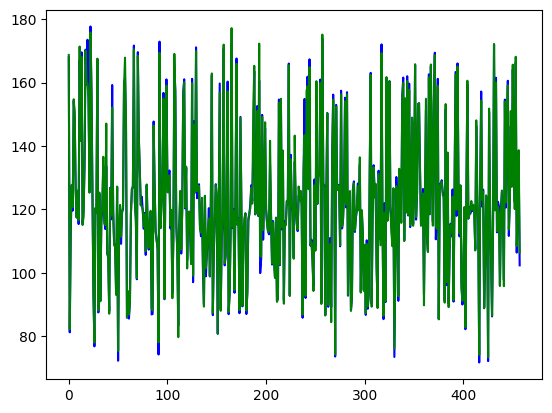

In [32]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(phi, color='green', label='Predicted Value')

In [33]:
from sklearn.metrics import accuracy_score


In [34]:
e = metrics.r2_score(Y_test, phi)
print("r^{2}", e)


r^{2} 0.9891677775265709


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


r2 = r2_score(Y_test, phi)
mae = mean_absolute_error(Y_test, phi)
mse = mean_squared_error(Y_test, phi)
rmse = np.sqrt(mse)


print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R² Score: 0.9891677775265709
Mean Absolute Error (MAE): 1.349345712205235
Mean Squared Error (MSE): 5.713385341244021
Root Mean Squared Error (RMSE): 2.3902688847165336


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(Y_test, phi)
mae = mean_absolute_error(Y_test, phi)
mse = mean_squared_error(Y_test, phi)
rmse = np.sqrt(mse)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R² Score: 0.9891677775265709
Mean Absolute Error (MAE): 1.349345712205235
Mean Squared Error (MSE): 5.713385341244021
Root Mean Squared Error (RMSE): 2.3902688847165336


In [37]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
X = gd.drop(['Date', 'GLD'], axis=1)
Y = gd['GLD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
rf_model = RandomForestRegressor(n_estimators=100)
xgb_model = XGBRegressor()
gb_model = GradientBoostingRegressor()

In [40]:
rf_model.fit(X_train, Y_train)
xgb_model.fit(X_train, Y_train)
gb_model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [41]:
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
gb_pred = gb_model.predict(X_test)


In [42]:
def evaluate_model(name, pred, true):
    return {
        'Model': name,
        'R² Score': metrics.r2_score(true, pred),
        'MAE': metrics.mean_absolute_error(true, pred),
        'MSE': metrics.mean_squared_error(true, pred),
        'RMSE': np.sqrt(metrics.mean_squared_error(true, pred))
    }

In [43]:

results = [
    evaluate_model('Random Forest', rf_pred, Y_test),
    evaluate_model('XGBoost', xgb_pred, Y_test),
    evaluate_model('Gradient Boosting', gb_pred, Y_test)
]


results_df = pd.DataFrame(results)
print(results_df)


print("\nNote: ROC curves are used for classification problems. For regression, we use these metrics instead.")

               Model  R² Score       MAE        MSE      RMSE
0      Random Forest  0.989166  1.350317   5.714581  2.390519
1            XGBoost  0.987385  1.464731   6.653740  2.579485
2  Gradient Boosting  0.976468  2.291027  12.411657  3.523018

Note: ROC curves are used for classification problems. For regression, we use these metrics instead.


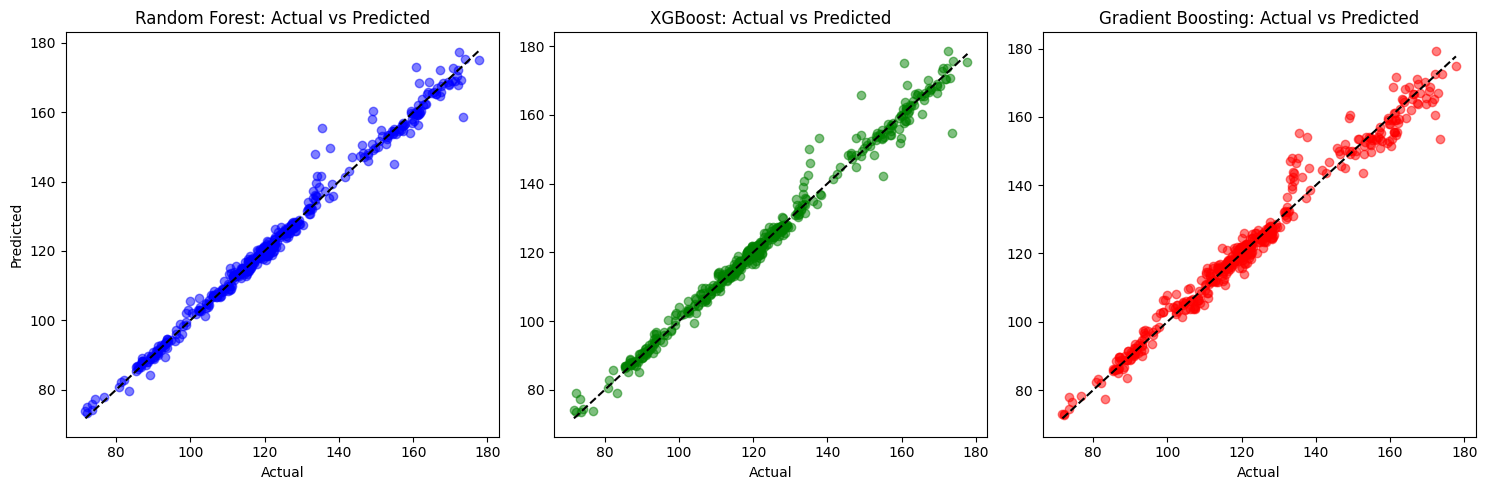

In [44]:

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter(Y_test, rf_pred, alpha=0.5, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(Y_test, xgb_pred, alpha=0.5, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual')

plt.subplot(1, 3, 3)
plt.scatter(Y_test, gb_pred, alpha=0.5, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Actual')

plt.tight_layout()
plt.show()